I have applied linear regression to predict the chance of getting an admit basaed on the features. This dataset can be found at https://www.kaggle.com/mohansacharya/graduate-admissions

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pandas as pd


In [13]:
admission_data = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [21]:
admission_data.keys()

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [23]:
admission_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


(array([ 5.,  3.,  5., 11., 13., 11., 22., 25., 25., 38., 33., 45., 46.,
        47., 38., 24., 24., 24., 31., 30.]),
 array([0.34  , 0.3715, 0.403 , 0.4345, 0.466 , 0.4975, 0.529 , 0.5605,
        0.592 , 0.6235, 0.655 , 0.6865, 0.718 , 0.7495, 0.781 , 0.8125,
        0.844 , 0.8755, 0.907 , 0.9385, 0.97  ]),
 <a list of 20 Patch objects>)

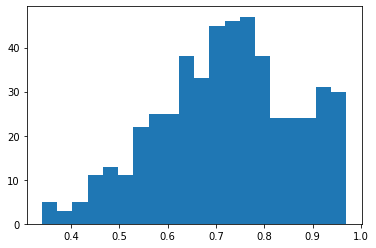

In [37]:
plt.hist(admission_data['Chance of Admit '], bins=20)

In [38]:
corr_matrix = admission_data.corr().round(2)

In [39]:
corr_matrix

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.00,-0.10,-0.14,-0.07,-0.14,-0.00,-0.07,-0.01,0.01
GRE Score,-0.10,1.00,0.83,0.64,0.61,0.52,0.83,0.56,0.81
TOEFL Score,-0.14,0.83,1.00,0.65,0.64,0.54,0.81,0.47,0.79
University Rating,-0.07,0.64,0.65,1.00,0.73,0.61,0.71,0.43,0.69
SOP,-0.14,0.61,0.64,0.73,1.00,0.66,0.71,0.41,0.68
LOR,-0.00,0.52,0.54,0.61,0.66,1.00,0.64,0.37,0.65
CGPA,-0.07,0.83,0.81,0.71,0.71,0.64,1.00,0.50,0.88
Research,-0.01,0.56,0.47,0.43,0.41,0.37,0.50,1.00,0.55
Chance of Admit,0.01,0.81,0.79,0.69,0.68,0.65,0.88,0.55,1.00


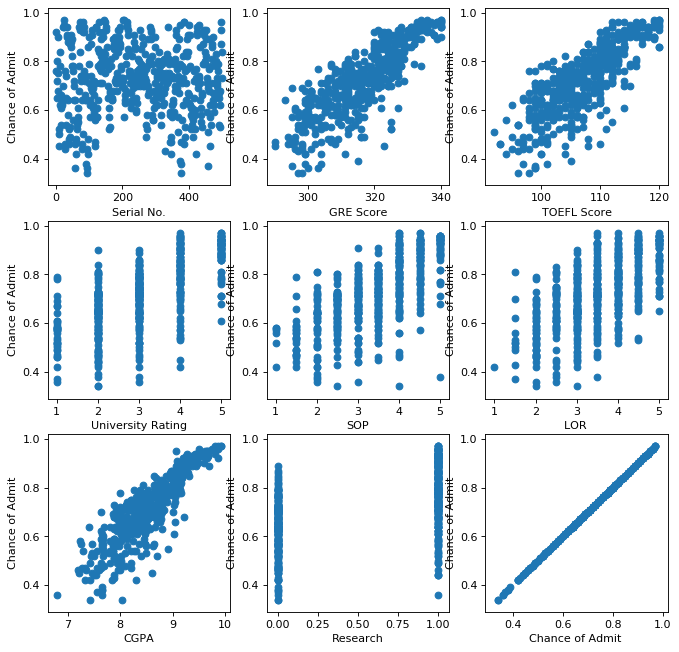

In [60]:
features  = ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit ']
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
for i,feat in enumerate(features,start=1):
    #print(features[i])
    plt.subplot(3,len(features)/3,i)
    plt.scatter(admission_data[feat],admission_data['Chance of Admit '])
    plt.xlabel(feat)
    plt.ylabel('Chance of Admit')


In [91]:
x=np.c_[admission_data['GRE Score'],admission_data['TOEFL Score'],admission_data['CGPA']]

In [92]:
y=admission_data['Chance of Admit ']

In [93]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [94]:
x

array([[337.  , 118.  ,   9.65],
       [324.  , 107.  ,   8.87],
       [316.  , 104.  ,   8.  ],
       ...,
       [330.  , 120.  ,   9.56],
       [312.  , 103.  ,   8.43],
       [327.  , 113.  ,   9.04]])

In [95]:
y=np.c_[admission_data['Chance of Admit ']]

In [96]:
lin_model = LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [97]:
lin_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [98]:
y_train_pre = lin_model.predict(x_train)
r2_score(y_train,y_train_pre)

0.8047029765929778

In [106]:
Y_test_pre = lin_model.predict(x_test)

In [107]:
r2_score(y_test,Y_test_pre)

0.8009573520549856